# PC assemble production line simulation (human edition)

## Initialization

Import the required libraries.

In [1]:
%matplotlib inline
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
from modsim import *
import random
import statistics
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

np.random.seed(7)

Initialize the state object

In [2]:
pcs = State(left = 0)
time = State(elapsed = 0)

,values
elapsed,0


Initialize the TimeSeries objects

In [3]:
assembled_pcs = TimeSeries()

,values


## Declaration

Declare the `random events` object

In [4]:
# Key: event name, value: probability
events = {
    'ausentismo': 0.05,
    'accidente': 0.05,
    'error': 0.15
}

{'ausentismo': 0.05, 'accidente': 0.05, 'error': 0.15}

Declare the `randomness` function:

In [5]:
# When called, returns an array of events happened
def randomness():
    events_happened = []
    for key in events:
        if flip(events[key]):
            events_happened.append(key)
            if key == 'ausentismo':
                return events_happened
    return events_happened

Declare the `assemble_pcs` function.

In [6]:
def assemble_pcs(employees, productivity):
    total_time = 0
    for i in range(employees):
        random_events_index = 1
        # Implementation of random events
        events_happened = randomness()
        # Checks events happened
        if 'accidente' in events_happened:
            random_events_index += 0.25
        if 'error' in events_happened:
            random_events_index += 0.50
        if 'ausentismo' in events_happened:
            random_events_index = 0

        build_time = random.randint(1800, 2900)
        
        productivity_index = (1 - productivity) + 1
        total_time += build_time * productivity_index * random_events_index
    average_time = total_time / employees
    return average_time

Declare the `get_productivity` function.

In [7]:
def get_productivity(time_elapsed):
    if (time.elapsed > 10800):
        if (time.elapsed < 14400):
            return 0.8
        if (time.elapsed > 21600):
            return 0.5
    return 1.0

Declare the `draw` function.

In [8]:
def draw():
    plot(assembled_pcs, color='blue', label='Assembled pcs')

    decorate(title='Assembled pcs by persons per day',
            xlabel='Time step (work days)', 
            ylabel='Number of pcs')

    savefig('figs/chap02-fig01.pdf')

Declare the `run_simulation` function.

In [9]:
def run_simulation(employees, pc_quantity):
    pcs.left = pc_quantity
    
    time_limit = 7 * 60 * 60 # work day time in seconds

    day = 1
    while True:
        productivity = get_productivity(time.elapsed)
        assemble_time = assemble_pcs(employees, productivity)
        time.elapsed += assemble_time
        pcs.left -= employees

        if (time.elapsed >= time_limit):
            assembled_pcs[day] = pc_quantity - pcs.left
            time.elapsed = 0
            print("Day " + str(day) + ": " + str(pc_quantity - pcs.left))
            day += 1
        if (pcs.left <= 0):
            assembled_pcs[day] = pc_quantity
            print("Finished " + str(pc_quantity) + " pcs in " + str(day) + " days!")
            break
    draw()

# Run simulation

- Employees: 
- Pc_quantity:

Day 1: 200
Day 2: 400
Day 3: 600
Day 4: 800
Day 5: 1000
Day 6: 1200
Day 7: 1400
Finished 1500 pcs in 8 days!
Saving figure to file figs/chap02-fig01.pdf


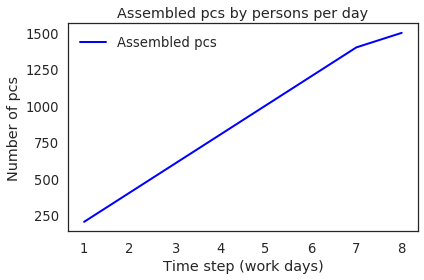

In [10]:
run_simulation(20, 1500)

# PC assemble production line simulation (machine edition)

## Initialization

Import the required libraries.

In [11]:
%matplotlib inline
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
from modsim import *
import random
import statistics
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

np.random.seed(7)

Initialize the state object

In [12]:
pcs = State(left = 0)
time = State(elapsed = 0)

,values
elapsed,0


Initialize the TimeSeries objects

In [13]:
assembled_pcs = TimeSeries()

,values


## Declaration

Declare the `assemble_pcs` function.

In [14]:
def assemble_pcs():
    total_time = 0
    machine_parallel_processes = 18
    time = random.randint(669, 934)
    total_time = time / machine_parallel_processes
    return total_time

Declare the `draw` function.

In [15]:
def draw():
    plot(assembled_pcs, color='green', label='Assembled pcs')

    decorate(title='Assembled pcs by persons per day',
            xlabel='Time step (work days)', 
            ylabel='Number of pcs')

    savefig('figs/chap02-fig01.pdf')

Declare the `run_simulation` function.

In [16]:
def run_simulation(pc_quantity):
    pcs.left = pc_quantity
    
    time_limit = 8 * 60 * 60 # work day time in seconds

    day = 1
    while True:
        assemble_time = assemble_pcs()
        time.elapsed += assemble_time
        pcs.left -= 1

        if (time.elapsed >= time_limit):
            assembled_pcs[day] = pc_quantity - pcs.left
            time.elapsed = 0
            print("Day " + str(day) + ": " + str(pc_quantity - pcs.left))
            day += 1
            
        if (pcs.left <= 0):
            assembled_pcs[day] = pc_quantity
            print("Finished " + str(pc_quantity) + " pcs in " + str(day) + " days!")
            break
    draw()

# Run simulation

- Pc_quantity:

Day 1: 655
Day 2: 1311
Finished 1500 pcs in 3 days!
Saving figure to file figs/chap02-fig01.pdf


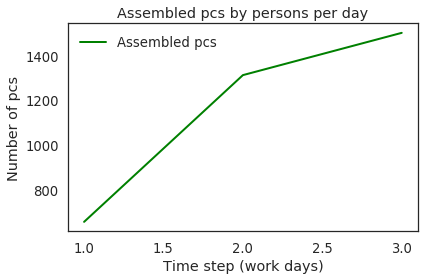

In [17]:
run_simulation(1500)